In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

**From above , There is no Null Values in the Data set**

### Drug Type Distribution

In [7]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

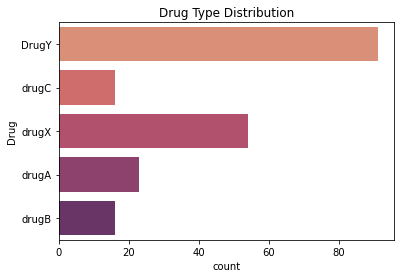

In [8]:

sns.countplot(y="Drug", data=df, palette="flare")
plt.title('Drug Type Distribution')
plt.show()

 It can be seen that from results above, DrugY has more amount than other types of drugs

### Gender Distribution

In [9]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

C:\Users\NANO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


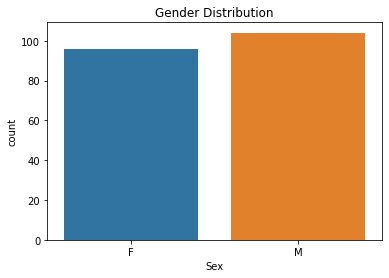

In [10]:
sns.countplot(df.Sex)
plt.title('Gender Distribution')
plt.show()

The distribution of patient gender is balanced

### Blood Pressure Distribution

In [11]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

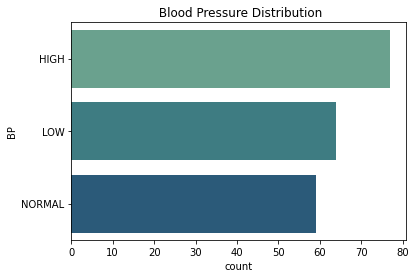

In [12]:
sns.countplot(y="BP", data=df, palette="crest")
plt.title(' Blood Pressure Distribution')
plt.show()

### Cholesterol Distribution

In [13]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

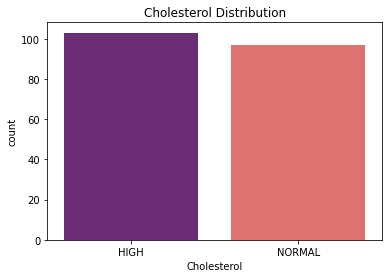

In [14]:
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.title('Cholesterol Distribution')
plt.show()

In [15]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Gender Distribution based on Drug Type

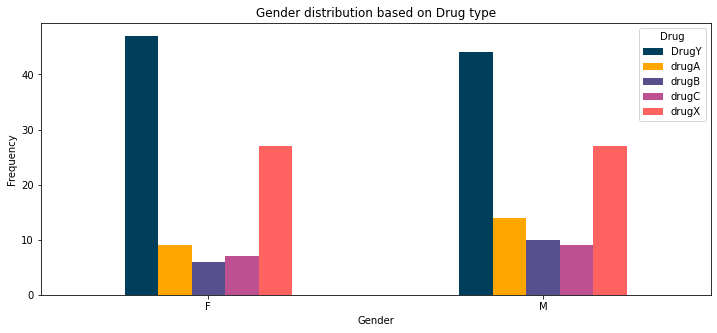

In [16]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

 ### Blood Pressure Distribution based on Cholesetrol

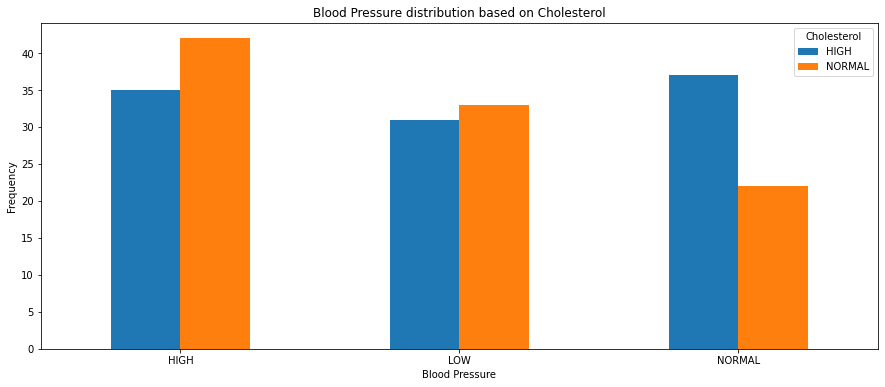

In [17]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6))
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

###  Sodium to Potassium Distribution based on Gender and Age 

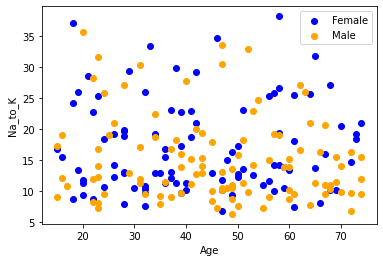

In [18]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

## Dataset Preparation 

 The age will be divided into 7 age categories:

* Below 20 y.o.
* 20 - 29 y.o.
* 30 - 39 y.o.
* 40 - 49 y.o.
* 50 - 59 y.o.
* 60 - 69 y.o.
* Above 70.

In [19]:
# Age
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

The chemical ratio will be divided into 4 categories:

* Below 10.
* 10 - 20.
* 20 - 30.
* Above 30.

In [20]:
# Na_to_k
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

In [21]:
df.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20


In [67]:
#  Splitting the dataset
from sklearn.model_selection import train_test_split
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [68]:
# Feature Engineering
#method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [69]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
169,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
97,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
31,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
12,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
35,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0


In [70]:
# SMOTE Technique
#Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

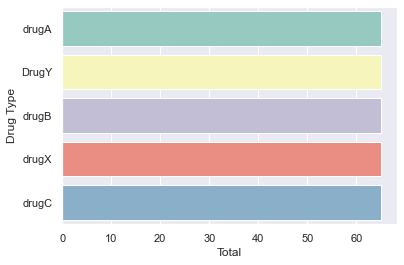

In [43]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="Set3")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## Model Building

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Logistic Regression 

In [45]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(max_iter=10000)
Log.fit(X_train, y_train)

y_pred = Log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.83      0.73      0.78        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.75      0.50      0.60         6
       drugX       0.86      1.00      0.92        18

    accuracy                           0.82        60
   macro avg       0.79      0.82      0.78        60
weighted avg       0.83      0.82      0.81        60

[[19  0  3  1  3]
 [ 1  6  0  0  0]
 [ 0  0  3  0  0]
 [ 3  0  0  3  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 81.67%


### Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       0.81      0.65      0.72        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.60      0.50      0.55         6
       drugX       0.82      1.00      0.90        18

    accuracy                           0.78        60
   macro avg       0.75      0.80      0.75        60
weighted avg       0.80      0.78      0.78        60

[[17  0  3  2  4]
 [ 1  6  0  0  0]
 [ 0  0  3  0  0]
 [ 3  0  0  3  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 78.33%


### Gaussian NB

In [47]:
from sklearn.naive_bayes import GaussianNB
NBG = GaussianNB()
NBG.fit(X_train, y_train)

y_pred = NBG.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBGAcc = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBGAcc*100))

              precision    recall  f1-score   support

       DrugY       0.56      0.85      0.68        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.75      0.50      0.60         6
       drugX       1.00      0.28      0.43        18

    accuracy                           0.65        60
   macro avg       0.76      0.70      0.66        60
weighted avg       0.76      0.65      0.62        60

[[22  0  3  1  0]
 [ 1  6  0  0  0]
 [ 0  0  3  0  0]
 [ 3  0  0  3  0]
 [13  0  0  0  5]]
Gaussian Naive Bayes accuracy is: 65.00%


### Categorical NB

In [48]:
from sklearn.naive_bayes import CategoricalNB
NBC = CategoricalNB()
NBC.fit(X_train, y_train)

y_pred = NBC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc*100))

              precision    recall  f1-score   support

       DrugY       0.86      0.69      0.77        26
       drugA       0.86      0.86      0.86         7
       drugB       0.43      1.00      0.60         3
       drugC       0.60      0.50      0.55         6
       drugX       0.90      1.00      0.95        18

    accuracy                           0.80        60
   macro avg       0.73      0.81      0.74        60
weighted avg       0.82      0.80      0.80        60

[[18  1  3  2  2]
 [ 0  6  1  0  0]
 [ 0  0  3  0  0]
 [ 3  0  0  3  0]
 [ 0  0  0  0 18]]
Naive Bayes accuracy is: 80.00%


###  Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_leaf_nodes=25)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       0.82      0.69      0.75        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.57      0.67      0.62         6
       drugX       0.89      0.94      0.92        18

    accuracy                           0.80        60
   macro avg       0.76      0.83      0.77        60
weighted avg       0.82      0.80      0.80        60

[[18  0  3  3  2]
 [ 1  6  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  4  0]
 [ 1  0  0  0 17]]
Decision Tree accuracy is: 80.00%


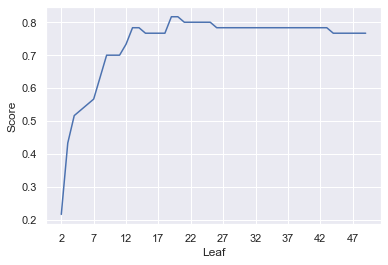

DT Acc Max 81.67%


In [50]:
scoreListDT = []
for i in range(2,50):
    DTC = DecisionTreeClassifier(max_leaf_nodes=i)
    DTC.fit(X_train, y_train)
    scoreListDT.append(DTC.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_leaf_nodes=20)
RFC.fit(X_train, y_train)

y_pred= RFC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc= accuracy_score(y_test, y_pred)
print("Random Forest Accuracy is: {:.2f}%".format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.58      0.73        26
       drugA       1.00      0.86      0.92         7
       drugB       0.43      1.00      0.60         3
       drugC       0.67      1.00      0.80         6
       drugX       0.78      1.00      0.88        18

    accuracy                           0.80        60
   macro avg       0.78      0.89      0.79        60
weighted avg       0.87      0.80      0.80        60

[[15  0  3  3  5]
 [ 0  6  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
Random Forest Accuracy is: 80.00%


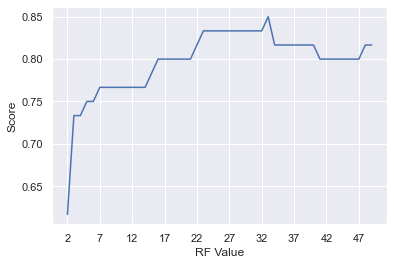

RF Acc Max 85.00%


In [52]:
scoreListRF = []
for i in range(2,50):
    RFC = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFC.fit(X_train, y_train)
    scoreListRF.append(RFC.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

In [53]:

compare = pd.DataFrame({'Model': ['Logistic Regression','Gaussian NB', 'SVM', 'Gaussian NB','Decision Tree','Decision Tree Max', 'Random Forest','Random Forest Max' ], 
                        'Accuracy': [LRAcc*100,NBGAcc*100, SVCAcc*100,NBAcc*100,DTAcc*100 , DTAccMax*100, RFAcc*100 ,RFAccMax*100]})

# Sorting the DataFrame by 'Accuracy' in descending order
compare.sort_values(by='Accuracy', ascending=False)



,Model,Accuracy
7,Random Forest Max,85.000000
0,Logistic Regression,81.666667
5,Decision Tree Max,81.666667
3,Gaussian NB,80.000000
4,Decision Tree,80.000000
6,Random Forest,80.000000
2,SVM,78.333333
1,Gaussian NB,65.000000


From the results, it can be seen that most of ML models can reach up to 80% accuracy in predicting classification of drug type.
Best accuracy is given by **Random Forest Max MODEL** SO we use that for prediction


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42,)
accuracies = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",model.score(X_test,y_test))

Train Score: 0.8830769230769231
Test Score: 0.8


In [66]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy'],
        'max_leaf_nodes':np.arange(10,50,5)
       }

rf = RandomForestClassifier(random_state = 12)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(X_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",100*rf_cv.best_score_)
print("Test Score:",100*rf_cv.score(X_test,y_test))

Hyperparameters: {'criterion': 'gini', 'max_leaf_nodes': 20, 'n_estimators': 100}
Train Score: 91.3846153846154
Test Score: 83.33333333333334


## Prediction

In [109]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
95,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
15,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
30,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
158,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
128,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [108]:
y_test.head()

95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
Name: Drug, dtype: object

In [110]:
feature = np.array(X_test.iloc[0])
feature
rf_cv.predict(feature.reshape(1,-1))

C:\Users\NANO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['drugX'], dtype=object)

In [111]:
import pickle
pickle.dump(rf_cv,open('Drug_model.pkl','wb'))

^C
